# Selenium이란?
* 웹브라우저를 자동으로 제어하는 라이브러리
* 원래 다양한 웹브라우저를 자동으로 테스트하는 도구
* 코드를 통해 웹브라우저 조작 가능
* 동적 웹사이트에서 정보를 가져오는데 활용

In [67]:
import selenium
print(selenium.__version__)
import pandas as pd

4.31.0


### options 중에 headless 이용하면 브라우저 안뜨고 돌아감

In [68]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

options = Options()
options.add_experimental_option("detach", True)
options.add_argument('start-maximized')

# 사람인척하기위해서 개발자도구 network에서 user-agent추가, 언어 추가
options.add_argument('Chrome/134.0.0.0')
options.add_argument('lang=ko_KR')

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
    )
driver.get("https://search.shopping.naver.com/book/search?bookTabType=ALL&pageIndex=1&pageSize=40&prevQuery=%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%B1%85&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&sort=REL")

# selenium에서 원하는 요소 찾기
* driver.find_element(By.CSS_SELECTOR, {css셀렉터}) : 1개의 요소 찾기
* driver.find_elements(By.CSS_SELECTOR, {css셀렉터}) : 여러개의 요소 찾기, list 반환
* driver.find_element(By.ID, 'id') : html에서 id 속성을 찾음
* driver.find_element(By.PARTIAL_LINK_TEXT, 'link에 포함된 문자') : link에 포함된 문자 찾기

In [69]:
driver.find_element(By.CSS_SELECTOR, '#book_list > ul > li:nth-child(1) div.bookListItem_text_area__6gSV2 > div.bookListItem_title__1mWGq > span > span:nth-child(1)').text

'혼자 만들면서 공부하는 파이썬'

In [70]:
for el in driver.find_elements(By.CSS_SELECTOR, '#book_list > ul > li div.bookListItem_title__1mWGq'):
    print(el.get_attribute('outerHTML'))
    print()

<div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>혼자 만들면서 공부하는 파이썬</span><span> (37개 라이브러리와 API로 보고서, 차트, 게임, 맵, AI 챗봇 만들기|저자 직강 유튜브 강의, 오픈 채팅 제공)</span></span></div>

<div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>혼자 공부하는 파이썬</span><span> (1:1 과외하듯 배우는 프로그래밍 자습서)</span></span></div>

<div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>Do it! 점프 투 파이썬</span><span> (중학생도 첫날부터 실습하는 초고속 입문서)</span></span></div>

<div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>파이썬</span></span></div>

<div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>파이썬</span><span> (제2판)</span></span></div>

<div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>파이썬</span></span></div>

<div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>파이썬</span><span> (비전공자를위한 파이썬 기초 입문서)</span></span></d

### id이름만!! #는 넣지 않는다

In [41]:
driver.find_element(By.ID, 'book_list').get_attribute('innerHTML')

'<div class="bookSearchList_sort_area___A5Fp"><div class="sortFilterItem_sort_box__1_TGY"><a href="#" role="button" class="sortFilterItem_btn_basic_sort__WUOjl" data-shp-page-key="100388780" data-shp-nsc="shopping.book" data-shp-inventory="bok_sch" data-shp-area="bok_sch.sortopen" data-shp-area-type="action" data-shp-area-id="sortopen">네이버 랭킹순<svg xmlns="http://www.w3.org/2000/svg" width="12" height="7" class="sortFilterItem_svg_arrow__gurAO"><path fill="#7C8187" d="M6.056 5.047 10.78.444l.775.755-5.5 5.357-5.5-5.357.774-.755z"></path></svg></a><ul class="sortFilterItem_list_sort__KLVJK"><li class="sortFilterItem_item_sort__94YJE sortFilterItem_type_info__UkZU1 sortFilterItem_active__sl_G6"><a href="#" role="button" class="sortFilterItem_btn_sort__l6g3x _nlog_click _nlog_impression_element" data-shp-page-key="100388780" data-shp-nsc="shopping.book" data-shp-inventory="bok_sch" data-shp-area="bok_sch.sort" data-shp-area-type="slot" data-shp-area-id="sort" data-shp-contents-id="네이버 랭킹순" 

In [45]:
 driver.find_element(By.PARTIAL_LINK_TEXT, '파이썬').get_attribute('innerHTML')

'<div class="bookListItem_thumbnail_area__W3MCC"><div class="bookListItem_thumbnail__ABXyE"><img src="https://shopping-phinf.pstatic.net/main_5285933/52859338841.20250209071357.jpg?type=w300" alt="혼자 만들면서 공부하는 파이썬"></div></div><div class="bookListItem_text_area__6gSV2"><div class="bookListItem_feature__Tck1v">컴퓨터/IT 103위</div><div class="bookListItem_title__1mWGq"><span class="bookListItem_text__oxa7M"><span>혼자 만들면서 공부하는 파이썬</span><span> (37개 라이브러리와 API로 보고서, 차트, 게임, 맵, AI 챗봇 만들기|저자 직강 유튜브 강의, 오픈 채팅 제공)</span></span></div><div class="bookListItem_detail__VW1kD"><div class="bookListItem_define_item__jqcW8"><span class="bookListItem_define_title__W5Fg6">저자</span><span class="bookListItem_define_data__fu2A5">문현일</span></div><div class="bookListItem_define_item__jqcW8 bookListItem_publish__6XykH"><div class="bookListItem_detail_publish__SGgZN"><span class="bookListItem_define_title__W5Fg6">출판</span><span class="bookListItem_define_data__fu2A5">한빛미디어</span></div><div class="bookListItem_det

## 찾은 요소에서 요소의 속성값 추출
* driver.find_element(By.CSS_SELECTOR, 'css셀렉터').get_attribute('속성명')

In [46]:
driver.find_element(By.CSS_SELECTOR, '#book_list > ul > li:nth-child(1) > div > div > div:nth-child(2) > a').get_attribute('href')

'https://cr3.shopping.naver.com/book/adcr?x=3qUZcLYOxVpE4qLJS05gp%2F%2F%2F%2Fw%3D%3DsMLiwJqQT3TxSdecFWnzLmVNpslUk%2B9zmXcAqidXCC2W57StUFLKmRh1TRW6ZM83N8J4%2BWoA5k6GrLR%2FPaAyGoxroQBkYpUXux4G%2FMTLuU5jHpz5zQeQNJ1MZ%2BLAu95DNlyh0D6GWyYcDN62QGBp0199%2BKy%2Fm0d%2BgYWHtEf61Jo4Nj51x%2B5NtY5Hk3HVsotFZybERCbFjjKXU5KB87jPY6zJlYDiJ6iMf%2FJhTgF6rY30Si1jPP8Yt02lZX7%2BJ%2FItc0Vh7XMGwivNkSgUMq%2BbY5T4YSqZ6yrmnKSAo0v3sTfA%2Bd0TcbJiTH3Lys8V5OoWgcfY62%2F%2BxY4w5xbi4%2BHEPriFzevyVajC7NvPtfqyjQhx2japNdk%2BolHoM7NfaF6t97pPdsO2laUIQ4dxtyds9rkeq7xa2bs6%2FahMzsv2lyyJ5SQWnPur7KfcO%2F%2BCm%2Fk3izfNVo1KcSVSazeZg7M%2BAaaiu8UijwP2ZPqUkQaimIv%2BRn3pOVdeEbmmL3GF6bx2lUcd8sgPslR1l2EsXiWQ6aIYJNVikDzdEqfyVj%2FjNoX6WAHQL7y5m2kfL9Hg2%2BV5YiTTX73NsM9LC0gIh66H4xkZ0ZvuBE4%2BhLZWkgE7ov7wqHVEaBjWga3OskBmXSIPw9zwlWtJiKOUk1I7q41%2FzjQ%3D%3D&nvMid=52859338841&catId=50010920'

# 검색창을 찾아 검색어 입력하고 서치버튼 입력
* 키보드 입력하기
    * .send_keys("키보드 입력(검색어) ex.핀테크")
    * .send_keys(Keys.ENTER)
* 마우스 클릭하기
    * driver.click()

In [48]:
search = '#gnb-gnb > div._gnb_header_area_nfFfz > div > div._gnbContent_gnb_content_JUwjU > div._gnbSearch_gnb_search_ULxKx._gnbSearch_type_price_comparison_YQqay._gnbSearch_search_result_DldBH > form > div > div > div > div > input'

In [51]:
search_box = driver.find_element(By.CSS_SELECTOR, search)
search_box

<selenium.webdriver.remote.webelement.WebElement (session="9cc9db17d4a806f430b9afe52fc81883", element="f.556162BDD5A1CD9BC9F85FEA5E0F5633.d.4A7145119A24C9EF441C8202AB055D0B.e.9")>

In [58]:
search_box.clear()
search_box.send_keys('핀테크')
search_box.send_keys(Keys.ENTER)

In [78]:
search_btn = driver.find_element(By.CSS_SELECTOR, '#gnb-gnb > div._gnb_header_area_nfFfz > div > div._gnbContent_gnb_content_JUwjU > div._gnbSearch_gnb_search_ULxKx._gnbSearch_type_price_comparison_YQqay._gnbSearch_search_result_DldBH > form > div > div > div > div > button._searchInput_button_search_wu9xq._nlog_click')
search_btn.click()

### 마우스 내리기

In [30]:
import time

In [31]:
for i in range(1,8):
    driver.execute_script(f'window.scrollTo(0,{i*1000})')
    time.sleep(2)

'<html lang="ko"><head><meta charset="utf-8" data-next-head=""><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no, viewport-fit=cover" data-next-head=""><meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" data-next-head=""><title data-next-head="">파이썬 : 네이버 도서</title><link rel="shortcut icon" href="https://ssl.pstatic.net/shoppingsearch/static/book/book-250402-163053/img/favicon.ico" data-next-head=""><link rel="apple-touch-icon" href="https://ssl.pstatic.net/shoppingsearch/static/book/book-250402-163053/img/favicon_180.png" data-next-head=""><meta property="og:title" content="파이썬 : 네이버 도서" data-next-head=""><meta property="og:description" content="\'파이썬\'의 네이버 도서 검색 결과입니다." data-next-head=""><meta property="og:image" content="https://ssl.pstatic.net/shoppingsearch/static/icons/ogtag_shopping_book.png" data-next-head=""><meta property="og:url" content="https://search.sho
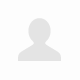
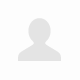

In [32]:
html_source = driver.page_source
html_source

In [33]:
from bs4 import BeautifulSoup as bs

In [36]:
soup = bs(html_source, 'lxml')
soup.select_one('#book_list > ul > li:nth-child(1) div.bookListItem_text_area__6gSV2 > div.bookListItem_title__1mWGq > span > span:nth-child(1)').text

'혼자 만들면서 공부하는 파이썬'

In [79]:
driver.close()

# 웹페이지 로딩될 때까지 기다리기

In [160]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as Ec

# wait = WebDriverWait(driver, 10)
# button = wait.until(EC.element_to_be_clickable(By.ID,'submit-button'))
# button.click()

# 실습

In [182]:
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
    )
driver.get('https://search.shopping.naver.com/book/home')

In [96]:
page = driver.find_element(By.CSS_SELECTOR,'#container > div > div.bookSearch_book_search__LRxIV > div > div.Paginator_list_paging__XbuO8 a.Paginator_active__5FSnb._nlog_click._nlog_impression_element + a')
page

<selenium.webdriver.remote.webelement.WebElement (session="edee650a9607af5487f8266f737116af", element="f.DF3F7AC8C0BF6E2C8F2EA75BE986A7C7.d.523036245AC6B50E79C92FA70365E396.e.5490")>

In [139]:
soup.select('#book_list > ul > li')[4].select_one('div > div > div > span > em').text

'27,600'

# 이게 최종--!!!!!
* 소스 받아오기 전에 천천히 스크롤 먼저 해줘야됨

In [195]:
search_box = driver.find_element(By.CSS_SELECTOR, '#gnb-gnb > div._gnb_header_area_nfFfz > div > div._gnbContent_gnb_content_JUwjU > div._gnbSearch_gnb_search_ULxKx._gnbSearch_type_price_comparison_YQqay > form > div > div > div > div > input')
search_box.clear()
search_box.send_keys('파이썬')
search_box.send_keys(Keys.ENTER)

python_book = []
columns = ['책제목', '링크', '저자', '출판사', '출간일', '평점', '가격']

for i in range(5):
    WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#book_list > ul > li")))
    
    for _ in range(8):  # 필요한 만큼 반복 (더 많으면 더 끝까지 감)
        driver.execute_script("window.scrollBy(0, 1000);")  # 아래로 500px씩 스크롤
        time.sleep(0.5)  # 너무 빠르면 로딩 안됨, 살짝 쉬어가기

    print(f'page {i} 스크롤 완료')
#     time.sleep(5)
    
    html_source = driver.page_source
    soup = bs(html_source, 'lxml')
    for book in soup.select('#book_list > ul > li'):
        title = book.select_one('.bookListItem_title__1mWGq > span > span:nth-child(1)').text
        link = book.select_one('a.bookListItem_info_top__DLxpl.linkAnchor._nlog_click._nlog_impression_element')['href']
        author = book.select_one('.bookListItem_text_area__6gSV2 > div.bookListItem_detail__VW1kD > div:nth-child(1) > span.bookListItem_define_data__fu2A5').text
        publisher = book.select_one('.bookListItem_detail__VW1kD div.bookListItem_detail_publish__SGgZN > span.bookListItem_define_data__fu2A5').text
        pub_date = book.select_one('.bookListItem_detail__VW1kD div.bookListItem_detail_date__6_wYJ').text
        rating = book.select_one('.bookListItem_text_area__6gSV2 > .bookListItem_grade__e60mi').text[2:5] if book.select_one('.bookListItem_text_area__6gSV2 > .bookListItem_grade__e60mi') else '0.0'
        price = book.select_one('div > div > div > span > em').text if book.select_one('div > div > div > span > em') else '-'
        
        python_book.append((title, link, author, publisher, pub_date, rating, price))
    print(f'page {i} append 완료 : {len(python_book)}')
    
    if i != 4:
#         page = driver.find_element(By.CSS_SELECTOR,'#container > div > div.bookSearch_book_search__LRxIV > div > div.Paginator_list_paging__XbuO8 a.Paginator_active__5FSnb._nlog_click._nlog_impression_element + a')
        next_btn = driver.find_element(By.CSS_SELECTOR, '.Paginator_active__5FSnb + a')
        driver.execute_script("arguments[0].scrollIntoView(true);", next_btn)
        time.sleep(1)
        driver.execute_script("arguments[0].click();", next_btn)
        time.sleep(1)

page 0 스크롤 완료
page 0 append 완료 : 40
page 1 스크롤 완료
page 1 append 완료 : 80
page 2 스크롤 완료
page 2 append 완료 : 120
page 3 스크롤 완료
page 3 append 완료 : 160
page 4 스크롤 완료
page 4 append 완료 : 200


In [196]:
print(len(python_book))
python_book_df = pd.DataFrame(python_book, columns=columns)
python_book_df

200


,책제목,링크,저자,출판사,출간일,평점,가격
0,혼자 만들면서 공부하는 파이썬,https://cr3.shopping.naver.com/book/adcr?x=pOn...,문현일,한빛미디어,2025.02.14.,5.0,"23,400"
1,혼자 공부하는 파이썬,https://cr3.shopping.naver.com/book/adcr?x=beQ...,윤인성,한빛미디어,2022.06.01.,4.9,"19,800"
2,Do it! 점프 투 파이썬,https://cr3.shopping.naver.com/book/adcr?x=UcW...,박응용,이지스퍼블리싱,2023.06.15.,4.9,"19,800"
3,파이썬,https://cr3.shopping.naver.com/book/adcr?x=nk9...,홍의경,생능출판,2022.03.09.,0.0,"29,440"
4,파이썬,https://cr3.shopping.naver.com/book/adcr?x=Yw8...,"염기원, 오지영",북두,2022.01.20.,0.0,"16,200"
...,...,...,...,...,...,...,...
195,72시간 파이썬 정복,https://cr3.shopping.naver.com/book/adcr?x=%2F...,"이승현, 이정환 외 2명",광문각,2019.07.30.,0.0,"21,600"
196,파이썬 웹 프로그래밍,https://cr3.shopping.naver.com/book/adcr?x=v8i...,김석훈,한빛미디어,2018.08.17.,5.0,-
197,파이썬 핵심 레퍼런스,https://cr3.shopping.naver.com/book/adcr?x=dpn...,마크 루츠,인사이트,2016.08.12.,0.0,"15,120"
198,파이썬 웹프로그래밍,https://cr3.shopping.naver.com/book/adcr?x=pOB...,김석훈,한빛미디어,2015.04.01.,0.0,-


In [168]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
    )
driver.get('https://search.shopping.naver.com/book/home')

In [175]:
# 검색어 입력
search_box = driver.find_element(By.CSS_SELECTOR, '#gnb-gnb > div._gnb_header_area_nfFfz > div > div._gnbContent_gnb_content_JUwjU > div._gnbSearch_gnb_search_ULxKx._gnbSearch_type_price_comparison_YQqay > form > div > div > div > div > input')
search_box.clear()
search_box.send_keys('파이썬')
search_box.send_keys(Keys.ENTER)

python_book = []
for i in range(5):
    WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#book_list > ul > li")))
    
    html_source = driver.page_source
    soup = bs(html_source, 'lxml')
    print(f'book list 수 : {len(soup.select("#book_list > ul > li"))}')
    
    for book in soup.select('#book_list > ul > li'):
        # 예외처리 포함
        title = book.select_one('.bookListItem_title__1mWGq > span > span:nth-child(1)')
        link = book.select_one('a.linkAnchor')
        author = book.select_one('.bookListItem_define_data__fu2A5')
        publisher = book.select_one('.bookListItem_detail_publish__SGgZN .bookListItem_define_data__fu2A5')
        pub_date = book.select_one('.bookListItem_detail_date__6_wYJ')
        rating = book.select_one('.bookListItem_grade__e60mi')
        price = book.select_one('div > div > div > span > em')

        python_book.append((
            title.text if title else '',
            link['href'] if link else '',
            author.text if author else '',
            publisher.text if publisher else '',
            pub_date.text if pub_date else '',
            rating.text[2:5] if rating else '0.0',
            price.text if price else '-'
        ))
        time.sleep(0.2)
    
    print(f'{i + 1}페이지 데이터 수집 완료 : {len(python_book)}')

    # 다음 페이지 클릭
    if i != 4:
        next_btn = driver.find_element(By.CSS_SELECTOR, '.Paginator_active__5FSnb + a')
        driver.execute_script("arguments[0].scrollIntoView(true);", next_btn)
        time.sleep(1)
        driver.execute_script("arguments[0].click();", next_btn)
        time.sleep(5)


book list 수 : 40
1페이지 데이터 수집 완료 : 40
book list 수 : 10
2페이지 데이터 수집 완료 : 50
book list 수 : 10
3페이지 데이터 수집 완료 : 60
book list 수 : 10
4페이지 데이터 수집 완료 : 70
book list 수 : 10
5페이지 데이터 수집 완료 : 80


In [167]:
len(python_book)

50

In [166]:
python_book_df_v2 = pd.DataFrame(python_book, columns=columns)
python_book_df_v2

,책제목,링크,저자,출판사,출간일,평점,가격
0,혼자 만들면서 공부하는 파이썬,https://cr3.shopping.naver.com/book/adcr?x=B3G...,문현일,한빛미디어,2025.02.14.,5.0,"23,400"
1,혼자 공부하는 파이썬,https://cr3.shopping.naver.com/book/adcr?x=OQo...,윤인성,한빛미디어,2022.06.01.,4.9,"19,800"
2,Do it! 점프 투 파이썬,https://cr3.shopping.naver.com/book/adcr?x=UP0...,박응용,이지스퍼블리싱,2023.06.15.,4.9,"19,800"
3,파이썬,https://cr3.shopping.naver.com/book/adcr?x=f5j...,홍의경,생능출판,2022.03.09.,0.0,"29,440"
4,파이썬,https://cr3.shopping.naver.com/book/adcr?x=G9K...,"염기원, 오지영",북두,2022.01.20.,0.0,"16,200"
5,파이썬,https://cr3.shopping.naver.com/book/adcr?x=j7U...,천인국,인피니티북스,2017.08.30.,0.0,"10,800"
6,파이썬,https://cr3.shopping.naver.com/book/adcr?x=xe3...,김명호,에듀웨이,2019.05.25.,0.0,"16,200"
7,파이썬,https://cr3.shopping.naver.com/book/adcr?x=yoa...,염기원,복두출판사,2020.08.20.,0.0,"13,500"
8,파이썬,https://cr3.shopping.naver.com/book/adcr?x=%2B...,김영천,기한재,2020.02.25.,0.0,"23,750"
9,파이썬,https://cr3.shopping.naver.com/book/adcr?x=no8...,"서정원, 김태령",생능출판,2019.02.28.,0.0,-


# Selenium 버전 최종--!!!!!
* 소스 받아오기 전에 천천히 스크롤 먼저 해줘야됨

In [197]:
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
    )
driver.get('https://search.shopping.naver.com/book/home')

In [199]:
# 검색어 입력
search_box = driver.find_element(By.CSS_SELECTOR, '#gnb-gnb > div._gnb_header_area_nfFfz > div > div._gnbContent_gnb_content_JUwjU > div._gnbSearch_gnb_search_ULxKx._gnbSearch_type_price_comparison_YQqay > form > div > div > div > div > input')
search_box.clear()
search_box.send_keys('파이썬')
search_box.send_keys(Keys.ENTER)

python_book_v3 = []

for i in range(5):
    # 책 리스트 로드 대기
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#book_list > ul > li"))
    )
    
    for _ in range(8):  # 필요한 만큼 반복 (더 많으면 더 끝까지 감)
        driver.execute_script("window.scrollBy(0, 1000);")  # 아래로 500px씩 스크롤
        time.sleep(0.5)  # 너무 빠르면 로딩 안됨, 살짝 쉬어가기

    print(f'page {i} 스크롤 완료')
    
    books = driver.find_elements(By.CSS_SELECTOR, "#book_list > ul > li")
    print(f"{i+1}페이지 book 수: {len(books)}")

    for book in books:
        try:
            title = book.find_element(By.CSS_SELECTOR, '.bookListItem_title__1mWGq > span > span:nth-child(1)').text
        except:
            title = ''
        try:
            link = book.find_element(By.CSS_SELECTOR, 'a.linkAnchor').get_attribute('href')
        except:
            link = ''
        try:
            author = book.find_element(By.CSS_SELECTOR, '.bookListItem_define_data__fu2A5').text
        except:
            author = ''
        try:
            publisher = book.find_element(By.CSS_SELECTOR, '.bookListItem_detail_publish__SGgZN .bookListItem_define_data__fu2A5').text
        except:
            publisher = ''
        try:
            pub_date = book.find_element(By.CSS_SELECTOR, '.bookListItem_detail_date__6_wYJ').text
        except:
            pub_date = ''
        try:
            rating = book.find_element(By.CSS_SELECTOR, '.bookListItem_grade__e60mi').text[2:5]
        except:
            rating = '0.0'
        try:
            price = book.find_element(By.CSS_SELECTOR, 'div > div > div > span > em').text
        except:
            price = '-'
        
        python_book_v3.append((title, link, author, publisher, pub_date, rating, price))
        time.sleep(0.1)
    
    print(f'{i + 1}페이지 수집 완료, 총 {len(python_book_v3)}개')

    # 다음 페이지 이동
    if i != 4:
        try:
            next_btn = driver.find_element(By.CSS_SELECTOR, '.Paginator_active__5FSnb + a')
            driver.execute_script("arguments[0].scrollIntoView(true);", next_btn)
            time.sleep(1)
            driver.execute_script("arguments[0].click();", next_btn)
            time.sleep(2)
        except Exception as e:
            print(f"다음 페이지 클릭 실패: {e}")
            break

page 0 스크롤 완료
1페이지 book 수: 40
1페이지 수집 완료, 총 40개
page 1 스크롤 완료
2페이지 book 수: 40
2페이지 수집 완료, 총 80개
page 2 스크롤 완료
3페이지 book 수: 40
3페이지 수집 완료, 총 120개
page 3 스크롤 완료
4페이지 book 수: 40
4페이지 수집 완료, 총 160개
page 4 스크롤 완료
5페이지 book 수: 40
5페이지 수집 완료, 총 200개


In [200]:
python_book_df_v3 = pd.DataFrame(python_book_v3, columns=columns)
python_book_df_v3

,책제목,링크,저자,출판사,출간일,평점,가격
0,혼자 만들면서 공부하는 파이썬,https://cr3.shopping.naver.com/book/adcr?x=Sby...,문현일,한빛미디어,2025.02.14.,5.0,"23,400"
1,혼자 공부하는 파이썬,https://cr3.shopping.naver.com/book/adcr?x=axv...,윤인성,한빛미디어,2022.06.01.,4.9,"19,800"
2,Do it! 점프 투 파이썬,https://cr3.shopping.naver.com/book/adcr?x=Wf8...,박응용,이지스퍼블리싱,2023.06.15.,4.9,"19,800"
3,파이썬,https://cr3.shopping.naver.com/book/adcr?x=6%2...,홍의경,생능출판,2022.03.09.,0.0,"29,440"
4,파이썬,https://cr3.shopping.naver.com/book/adcr?x=5ZF...,"염기원, 오지영",북두,2022.01.20.,0.0,"16,200"
...,...,...,...,...,...,...,...
195,72시간 파이썬 정복,https://cr3.shopping.naver.com/book/adcr?x=Zy0...,"이승현, 이정환 외 2명",광문각,2019.07.30.,0.0,"21,600"
196,파이썬 웹 프로그래밍,https://cr3.shopping.naver.com/book/adcr?x=Nns...,김석훈,한빛미디어,2018.08.17.,5.0,-
197,파이썬 핵심 레퍼런스,https://cr3.shopping.naver.com/book/adcr?x=b96...,마크 루츠,인사이트,2016.08.12.,0.0,"15,120"
198,파이썬 웹프로그래밍,https://cr3.shopping.naver.com/book/adcr?x=sem...,김석훈,한빛미디어,2015.04.01.,0.0,-


### 데이터프레임을 CSV로 저장하되 내용 추가하면서 저장하기

In [ ]:
# 한줄씩 추가
result = pd.DataFrame([temp], columns=columns)
result.to_csv('./scraping_results/네이버책_selenium.csv', mode = 'a', index=False, encoding='utf-8-sig')

# DB 저장 버전

In [201]:
from book_dbio import *

book_title = input('검색할 책 제목을 입력하시오 : ')

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
    )
driver.get('https://search.shopping.naver.com/book/home')

search_box = driver.find_element(By.CSS_SELECTOR, '#gnb-gnb > div._gnb_header_area_nfFfz > div > div._gnbContent_gnb_content_JUwjU > div._gnbSearch_gnb_search_ULxKx._gnbSearch_type_price_comparison_YQqay > form > div > div > div > div > input')
search_box.clear()
search_box.send_keys(book_title)
search_box.send_keys(Keys.ENTER)

python_book = []
columns = ['책제목', '링크', '저자', '출판사', '출간일', '평점', '가격']

for i in range(5):
    WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#book_list > ul > li")))
    
    for _ in range(8):  # 필요한 만큼 반복 (더 많으면 더 끝까지 감)
        driver.execute_script("window.scrollBy(0, 1000);")  # 아래로 500px씩 스크롤
        time.sleep(0.5)  # 너무 빠르면 로딩 안됨, 살짝 쉬어가기

    print(f'page {i} 스크롤 완료')
#     time.sleep(5)
    
    html_source = driver.page_source
    soup = bs(html_source, 'lxml')
    for book in soup.select('#book_list > ul > li'):
        title = book.select_one('.bookListItem_title__1mWGq > span > span:nth-child(1)').text
        link = book.select_one('a.bookListItem_info_top__DLxpl.linkAnchor._nlog_click._nlog_impression_element')['href']
        author = book.select_one('.bookListItem_text_area__6gSV2 > div.bookListItem_detail__VW1kD > div:nth-child(1) > span.bookListItem_define_data__fu2A5').text
        publisher = book.select_one('.bookListItem_detail__VW1kD div.bookListItem_detail_publish__SGgZN > span.bookListItem_define_data__fu2A5').text
        pub_date = book.select_one('.bookListItem_detail__VW1kD div.bookListItem_detail_date__6_wYJ').text
        rating = book.select_one('.bookListItem_text_area__6gSV2 > .bookListItem_grade__e60mi').text[2:5] if book.select_one('.bookListItem_text_area__6gSV2 > .bookListItem_grade__e60mi') else '0.0'
        price = book.select_one('div > div > div > span > em').text if book.select_one('div > div > div > span > em') else '-'
        
        temp = (title, link, author, publisher, pub_date, rating, price)
        df = pd.DataFrame([temp],columns=columns)
        saveDB(df,book_title)
        
#         python_book.append((title, link, author, publisher, pub_date, rating, price))

    print(f'page {i} append 완료 : {len(python_book)}')
    
    if i != 4:
#         page = driver.find_element(By.CSS_SELECTOR,'#container > div > div.bookSearch_book_search__LRxIV > div > div.Paginator_list_paging__XbuO8 a.Paginator_active__5FSnb._nlog_click._nlog_impression_element + a')
        next_btn = driver.find_element(By.CSS_SELECTOR, '.Paginator_active__5FSnb + a')
        driver.execute_script("arguments[0].scrollIntoView(true);", next_btn)
        time.sleep(1)
        driver.execute_script("arguments[0].click();", next_btn)
        time.sleep(1)

검색할 책 제목을 입력하시오 : 파이썬
page 0 스크롤 완료
page 0 append 완료 : 0
page 1 스크롤 완료
page 1 append 완료 : 0
page 2 스크롤 완료
page 2 append 완료 : 0
page 3 스크롤 완료
page 3 append 완료 : 0
page 4 스크롤 완료
page 4 append 완료 : 0


# 번역 기능 추가

In [201]:
from book_dbio import *

book_title = input('검색할 책 제목을 입력하시오 : ')

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
    )
driver.get('https://search.shopping.naver.com/book/home')

search_box = driver.find_element(By.CSS_SELECTOR, '#gnb-gnb > div._gnb_header_area_nfFfz > div > div._gnbContent_gnb_content_JUwjU > div._gnbSearch_gnb_search_ULxKx._gnbSearch_type_price_comparison_YQqay > form > div > div > div > div > input')
search_box.clear()
search_box.send_keys(book_title)
search_box.send_keys(Keys.ENTER)

python_book = []
columns = ['책제목', '링크', '저자', '출판사', '출간일', '평점', '가격']

for i in range(5):
    WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#book_list > ul > li")))
    
    for _ in range(8):  # 필요한 만큼 반복 (더 많으면 더 끝까지 감)
        driver.execute_script("window.scrollBy(0, 1000);")  # 아래로 500px씩 스크롤
        time.sleep(0.5)  # 너무 빠르면 로딩 안됨, 살짝 쉬어가기

    print(f'page {i} 스크롤 완료')
#     time.sleep(5)
    
    html_source = driver.page_source
    soup = bs(html_source, 'lxml')
    for book in soup.select('#book_list > ul > li'):
        title = book.select_one('.bookListItem_title__1mWGq > span > span:nth-child(1)').text
        link = book.select_one('a.bookListItem_info_top__DLxpl.linkAnchor._nlog_click._nlog_impression_element')['href']
        author = book.select_one('.bookListItem_text_area__6gSV2 > div.bookListItem_detail__VW1kD > div:nth-child(1) > span.bookListItem_define_data__fu2A5').text
        publisher = book.select_one('.bookListItem_detail__VW1kD div.bookListItem_detail_publish__SGgZN > span.bookListItem_define_data__fu2A5').text
        pub_date = book.select_one('.bookListItem_detail__VW1kD div.bookListItem_detail_date__6_wYJ').text
        rating = book.select_one('.bookListItem_text_area__6gSV2 > .bookListItem_grade__e60mi').text[2:5] if book.select_one('.bookListItem_text_area__6gSV2 > .bookListItem_grade__e60mi') else '0.0'
        price = book.select_one('div > div > div > span > em').text if book.select_one('div > div > div > span > em') else '-'
        
        temp = (title, link, author, publisher, pub_date, rating, price)
        df = pd.DataFrame([temp],columns=columns)
        saveDB(df,book_title)
        
#         python_book.append((title, link, author, publisher, pub_date, rating, price))

    print(f'page {i} append 완료 : {len(python_book)}')
    
    if i != 4:
#         page = driver.find_element(By.CSS_SELECTOR,'#container > div > div.bookSearch_book_search__LRxIV > div > div.Paginator_list_paging__XbuO8 a.Paginator_active__5FSnb._nlog_click._nlog_impression_element + a')
        next_btn = driver.find_element(By.CSS_SELECTOR, '.Paginator_active__5FSnb + a')
        driver.execute_script("arguments[0].scrollIntoView(true);", next_btn)
        time.sleep(1)
        driver.execute_script("arguments[0].click();", next_btn)
        time.sleep(1)

검색할 책 제목을 입력하시오 : 파이썬
page 0 스크롤 완료
page 0 append 완료 : 0
page 1 스크롤 완료
page 1 append 완료 : 0
page 2 스크롤 완료
page 2 append 완료 : 0
page 3 스크롤 완료
page 3 append 완료 : 0
page 4 스크롤 완료
page 4 append 완료 : 0
